c:\Users\remote desktop\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


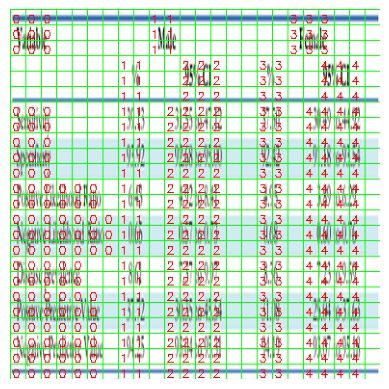

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from data import TrainDataset

# finish preprocessing until the resulting tensor
# visualize gt here + patch lines

def draw_grid_with_gt_indices(image, gt_patch_indices, patch_size=16):
    # Convert PIL Image to NumPy array
    image = np.array(image)
    h, w, _ = image.shape

    patch_idx = 0
    for y in range(0, h, patch_size):
        for x in range(0, w, patch_size):
            # Draw the rectangle for the patch
            cv2.rectangle(image, (x, y), (x + patch_size, y + patch_size), (0, 255, 0), 1)
            
            # Get the ground truth index for the current patch
            gt_index = gt_patch_indices[patch_idx]
            
            # Overlay the integer on the patch
            if gt_index != -1:
                cv2.putText(image, str(gt_index), (x + 2, y + 14), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 0, 0), 1)
            
            patch_idx += 1

    return image


dataset = TrainDataset(r'C:\Users\remote desktop\Downloads\unitable-main\dataset\pubtabnet_test\val', r"C:\Users\remote desktop\Downloads\unitable-main\dataset\pubtabnet_test\val\pubtabnet_test_val.jsonl", 16,384)

image, gt_patch_indices = dataset[0]
image_with_grid = draw_grid_with_gt_indices(image, gt_patch_indices, patch_size=16)

# Display the image using Matplotlib
plt.imshow(image_with_grid)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

In [2]:
print(len(gt_patch_indices))

1024
